In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [4]:
OHCO = ['book_id', 'chap_num']

In [6]:
BOW = pd.read_csv('myBOW.csv').set_index(OHCO+['term_str'])
LIB = pd.read_csv('LIB.csv').set_index('book_id')

In [18]:
LIB

,source_file_path,raw_title,regex,author,gender,book_len,n_chaps
book_id,,,,,,,
1,100_english_novels-master/corpus/project/Barcl...,Ladies,'CHAPTER\\s[A-Za-z]',FLORENCE L. BARCLAY,female,121858,60
2,100_english_novels-master/corpus/project/Barcl...,Postern,'^THE\\s[A-Za-z]+ DAY$',FLORENCE L. BARCLAY,female,39870,8
3,100_english_novels-master/corpus/project/Benne...,Babylon,'^Chapter\\s',ARNOLD BENNETT,male,65965,30
4,100_english_novels-master/corpus/project/Benne...,Helen,'^Chapter\\s[0-9]+',ARNOLD BENNETT,male,52456,27
5,100_english_novels-master/corpus/project/Burne...,Garden,'^CHAPTER\\s[A-Za-z]',FRANCES HODGSON BURNETT,male,66798,19
6,100_english_novels-master/corpus/project/Burne...,Princess,'^\\d\\s',FRANCES HODGSON BURNETT,male,66798,19
7,100_english_novels-master/corpus/project/Chest...,Innocence,'^\\s[A-Za-z]+ ',G. K. CHESTERTON,male,78996,25
8,100_english_novels-master/corpus/project/Chest...,Napoleon,'^CHAPTER\\s[A-Za-z]',G. K. CHESTERTON,male,54652,15
9,100_english_novels-master/corpus/project/Conra...,Almayer,'',JOSEPH CONRAD,male,169032,29


In [43]:
LIB['raw_title']

book_id
1         Ladies
2        Postern
3        Babylon
4          Helen
5         Garden
6       Princess
7      Innocence
8       Napoleon
9        Almayer
10      Nostromo
11         Hound
12          Lost
13        Lovers
14         Wives
15         Brown
16      Penelope
17          Ashe
18       Harvest
19    Lighthouse
20         Night
Name: raw_title, dtype: object

In [44]:
LIB['title_gender'] = ['Ladies F', 'Postern F', 'Babylon M', 'Helen M', 'Gardern M', 'Princess M', 'Innocence M',
                      'Napolean M', 'Alamayer M', 'Nostromo M', 'Hound M', 'Lost M', 'Lovers F', 'Wives F',
                      'Brown F', 'Penelope F', 'Ashe F', 'Harvest F', 'Lighthouse F', 'Night F']

In [45]:
LIB

,source_file_path,raw_title,regex,author,gender,book_len,n_chaps,kendall_sum,title_gender
book_id,,,,,,,,,
1,100_english_novels-master/corpus/project/Barcl...,Ladies,'CHAPTER\\s[A-Za-z]',FLORENCE L. BARCLAY,female,121858,60,6.401330,Ladies F
2,100_english_novels-master/corpus/project/Barcl...,Postern,'^THE\\s[A-Za-z]+ DAY$',FLORENCE L. BARCLAY,female,39870,8,6.776220,Postern F
3,100_english_novels-master/corpus/project/Benne...,Babylon,'^Chapter\\s',ARNOLD BENNETT,male,65965,30,6.318788,Babylon M
4,100_english_novels-master/corpus/project/Benne...,Helen,'^Chapter\\s[0-9]+',ARNOLD BENNETT,male,52456,27,6.613275,Helen M
5,100_english_novels-master/corpus/project/Burne...,Garden,'^CHAPTER\\s[A-Za-z]',FRANCES HODGSON BURNETT,male,66798,19,7.546690,Gardern M
6,100_english_novels-master/corpus/project/Burne...,Princess,'^\\d\\s',FRANCES HODGSON BURNETT,male,66798,19,7.546690,Princess M
7,100_english_novels-master/corpus/project/Chest...,Innocence,'^\\s[A-Za-z]+ ',G. K. CHESTERTON,male,78996,25,6.516224,Innocence M
8,100_english_novels-master/corpus/project/Chest...,Napoleon,'^CHAPTER\\s[A-Za-z]',G. K. CHESTERTON,male,54652,15,6.209197,Napolean M
9,100_english_novels-master/corpus/project/Conra...,Almayer,'',JOSEPH CONRAD,male,169032,29,6.168169,Alamayer M


In [8]:
BOW

n        tf     tfidf
book_id chap_num term_str                          
1       1        a           23  0.019793  0.000165
                 abide        1  0.000861  0.004048
                 above        1  0.000861  0.000978
                 absence      1  0.000861  0.002074
                 adoration,   1  0.000861  0.005769
...                          ..       ...       ...
20      34       yet          1  0.000434  0.000146
                 you         19  0.008250  0.001226
                 you've       1  0.000434  0.000806
                 you,         1  0.000434  0.000249
                 your         1  0.000434  0.000139

[599887 rows x 3 columns]

In [10]:
get_tfidf = lambda X, agg_func='sum': (X.T / X.T.agg(agg_func)).T * (np.log2(len(X)/X.astype('bool').sum()))
TFIDF_CHAP = get_tfidf(BOW.n.unstack(fill_value=0))
TFIDF = TFIDF_CHAP.groupby(OHCO[:1]).sum()

In [11]:
TFIDF

term_str,''tis,'--and,"'66,",'_i,"'_im_,",'a,'a','a'd,'a'll,'a'm,...,æsthetic,ça,"éclat,",égal,"égal,",élément,êtes,ťn,ťrrois,ťtait
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.005530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000703,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002077,0.002077,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.028397,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000948,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000948,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.002085,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean / Euclidean

In [13]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [14]:
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')  

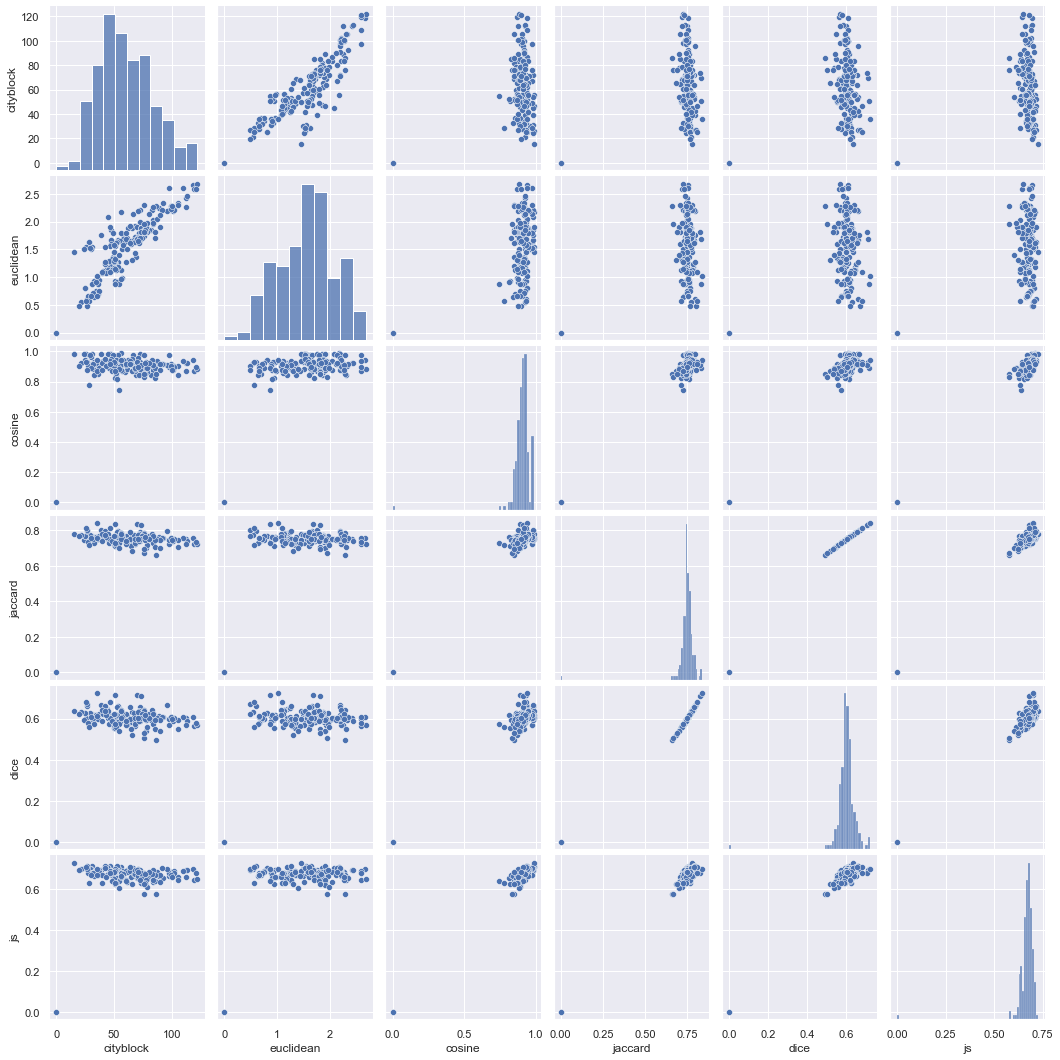

In [15]:
SAMPLE = PAIRS.sample(1000) if PAIRS.shape[0] > 1000 else PAIRS
sns.pairplot(SAMPLE);

### HIERARCHAL CLUSTERS

In [46]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = LIB.title_gender.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

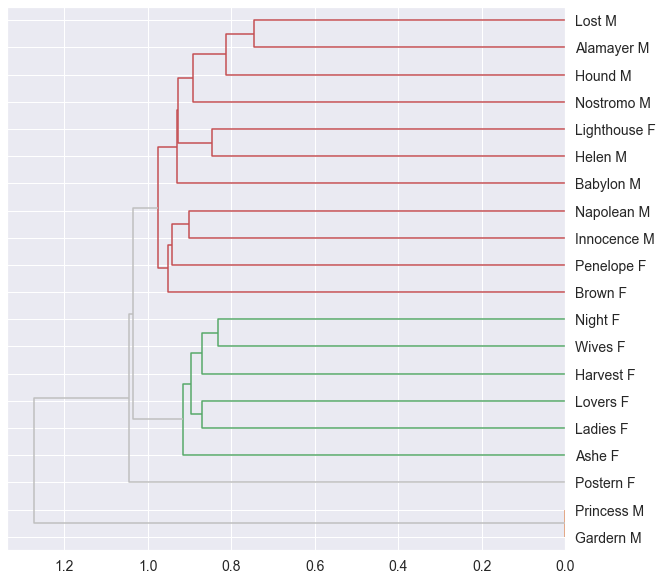

In [47]:
hca(PAIRS.cosine, linkage_method='ward', color_thresh=1)


<Figure size 432x288 with 0 Axes>

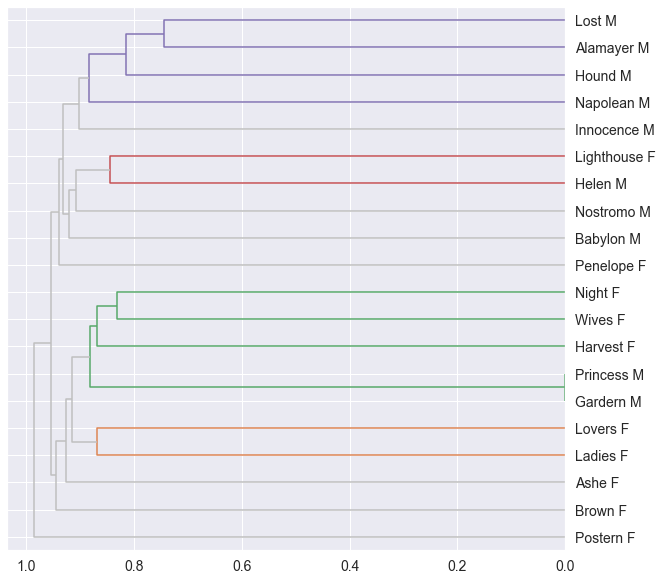

In [48]:
hca(PAIRS.cosine, linkage_method='complete', color_thresh=.9);


### Correlation

In [49]:
corr_type = 'kendall'

In [50]:
CORR_MATRIX = TFIDF.T.corr(corr_type)

In [51]:
(CORR_MATRIX * 10).astype('int')

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
book_id,,,,,,,,,,,,,,,,,,,,
1,10,3,2,2,3,3,2,2,2,3,2,2,2,2,2,2,2,2,3,3
2,3,10,2,3,3,3,2,2,2,3,3,2,2,3,3,2,2,2,3,3
3,2,2,10,3,3,3,2,2,2,2,3,2,2,2,2,2,2,2,2,2
4,2,3,3,10,3,3,2,2,2,2,3,2,2,3,3,2,2,2,2,3
5,3,3,3,3,10,9,3,2,2,3,3,2,2,3,3,3,2,2,3,3
6,3,3,3,3,9,10,3,2,2,3,3,2,2,3,3,3,2,2,3,3
7,2,2,2,2,3,3,10,3,2,3,3,2,2,2,2,2,2,2,3,3
8,2,2,2,2,2,2,3,10,2,2,2,2,2,2,2,2,2,2,2,2
9,2,2,2,2,2,2,2,2,10,3,2,2,2,2,2,2,2,2,2,3


In [52]:
SORT = CORR_MATRIX.mean().sort_values(ascending=False).index
(CORR_MATRIX.loc[SORT, SORT] * 10).astype('int')

book_id,5,6,20,11,2,10,4,19,7,15,1,14,16,3,12,8,9,13,18,17
book_id,,,,,,,,,,,,,,,,,,,,
5,10,9,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2
6,9,10,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2
20,3,3,10,3,3,3,3,3,3,3,3,3,2,2,3,2,3,2,2,2
11,3,3,3,10,3,3,3,2,3,2,2,2,3,3,3,2,2,2,2,2
2,3,3,3,3,10,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2
10,3,3,3,3,3,10,2,3,3,2,3,2,3,2,3,2,3,2,2,2
4,3,3,3,3,3,2,10,2,2,3,2,3,2,3,2,2,2,2,2,2
19,3,3,3,2,3,3,2,10,3,2,3,2,2,2,2,2,2,2,2,2
7,3,3,3,3,2,3,2,3,10,2,2,2,2,2,2,3,2,2,2,2


In [53]:
LIB['kendall_sum'] = CORR_MATRIX.sum()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


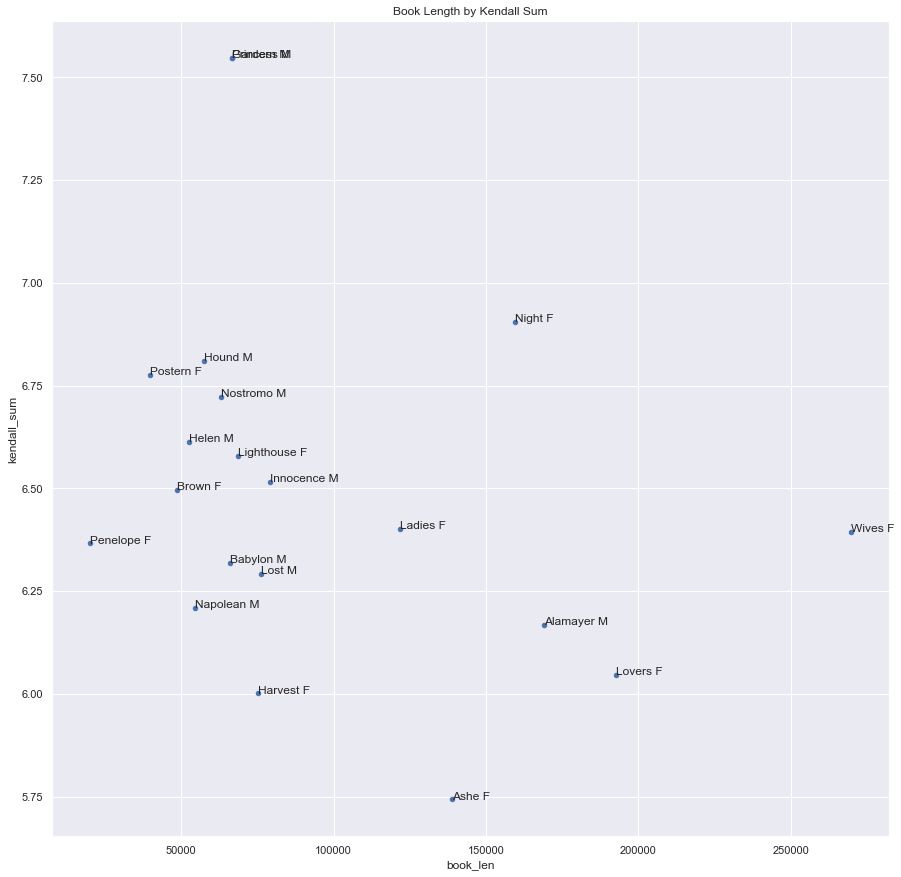

In [54]:
ax = LIB.plot.scatter('book_len', 'kendall_sum', figsize=(15,15), title="Book Length by Kendall Sum")
LIB.apply(lambda row: ax.text(row.book_len, row.kendall_sum, row.title_gender), axis=1);

In [55]:
MALE_idx = LIB[LIB.gender == 'male'].index.to_list()
FEM_idx = LIB[LIB.gender == 'female'].index.to_list()

In [56]:
CORR_MATRIX.loc[MALE_idx, MALE_idx].stack().mean()

0.38386584363639165

In [57]:
CORR_MATRIX.loc[FEM_idx, FEM_idx].stack().mean()

0.35351479418500686

In [58]:
### SAVE THESE AT THE END IN THE RIGHT FOLDER

In [59]:
#TFIDF.to_csv(f"{data_out}/{data_prefix}-TFIDF_book.csv")
#CORR.join(PAIRS).to_csv(f"{data_out}/{data_prefix}-DOCPAIRS.csv")
LIB.to_csv('LIB_ADDED.csv')